## Esempio: Random Walk (2D)

**Consideriamo una approssimazione di moto dovuto ad agitazione termica**

Una particella si muove su un piano:

* La particella si muove per passi discreti ($+1$, $-1$)
* Ci sono 4 direzioni possibili: sx, su, dx, giù
* Ad ogni passo ogni direzione è equiprobabile

Questo modello in Fisica si chiama [Random Walk](https://en.wikipedia.org/wiki/Random_walk)

<center>
<img src="assets/randomwalk.png" width=70%/>
</center>

## Esempio: Random Walk (2D)

**Formalmente**

Lo stato della particella è descritto da due quantità:

* La sua posizione orizzontale $x$
* La sua posizione verticale $y$

L'evoluzione dello stato è definita dalla ricorsione:

$$
(x_{k+1}, y_{k+1}) = \left\{\begin{aligned}
& (x_k-1, y_k) & \text{con probabilità $25\%$} \\
& (x_k, y_k+1) & \text{con probabilità $25\%$} \\
& (x_k+1, y_k) & \text{con probabilità $25\%$} \\
& (x_k, y_k-1) & \text{altrimenti}
\end{aligned}\right.
$$

## Esempio: Random Walk (2D)

**Nel modulo `example.rw2.py`, si definisca la classe:**

```python
class RWState2D:
    def __init__(self, x=0, y=0): ...
    
    def nextState(self): ...
    
    def __repr__(self): ...
```

* Che rappresenti uno stato del modello di Random Walk
* ...Utilizzando l'approccio già visto per la crescita logistica

**Una possibile soluzione è disponibile nel file [sol/rw.py](http://127.0.0.1:8888/edit/sol/rw.py)**

## Esempio: Random Walk (2D)

**Si collaudi la classe nella cella seguente**

In [4]:
%load_ext autoreload
%autoreload 2
from example import rw2

x0 = rw2.RWState2D()
print(x0)
x1 = x0.nextState()
print(x1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
RWState2D(x=0, y=0)
RWState2D(x=-1, y=0)


## Esempio: Random Walk (2D)

**Nel modulo `example.sim.py`, si definisca la funzione:**

```python
def plot_2d_trajectory(x, y, xlabel=None, ylabel=None, figsize=None, title=None)
```

Che, data una sequenza di coordinate `x` ed `y` disegni una traiettoria

* I due parametri `xlabel` e `ylabel` indicano i nomi dei due assi

**Nei sistemi dinamici, una _traiettoria_ rappresenta**

* La _sequenza degli stati visitati_
* ...Privata delle informazioni temporali (e.g. sequenza delle coordinate $x, y$)

Nel nostro esempio si tratta delle posizioni visitate sul piano

## Esempio: Random Walk (2D)

**Il codice della funzione è riportato di seguito**

```python
def plot_2d_trajectory(x, y, xlabel=None, ylabel=None, figsize=None, title=None):
    plt.figure(figsize=figsize)
    plt.plot(x, y)
    if xlabel is not None:
        plt.xlabel(xlabel) # Nome dell'asse x
    if ylabel is not None:
        plt.ylabel(ylabel) # Nome dell'asse y
    if title is not None:
        plt.title(title)
    plt.show()
```

...Ed è disponibile nel file [example/sim.py](http://127.0.0.1:8888/edit/sol/rw.py)

## Esempio: Random Walk (2D)

**A partire dall'origine si disegnino le _traiettorie_ per diverse simulazioni del modello**

Allo scopo, si utilizzino le funzioni `simulate` e `plot_2d_trajectory`

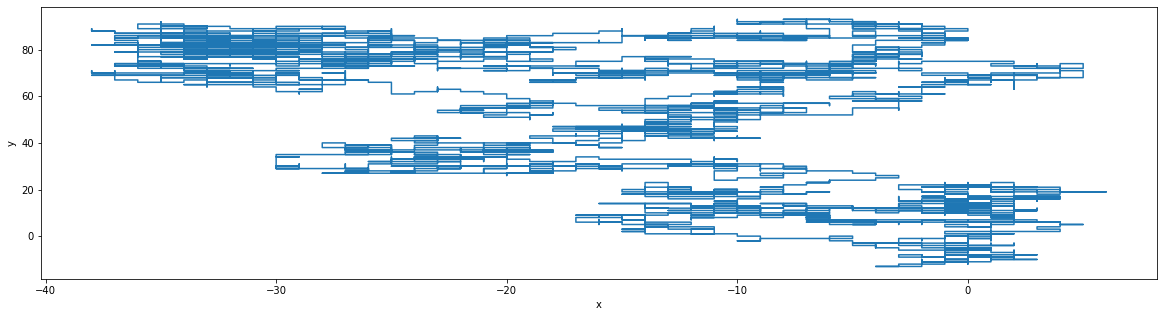

In [12]:
from example import rw2, sim

n = 5000

x0 = rw2.RWState2D()
states = sim.simulate(x0, n=n)
x, y = [s.x for s in states], [s.y for s in states]

sim.plot_2d_trajectory(x, y, xlabel='x', ylabel='y', figsize=(20, 5))